<h1 style='color:GREEN' align="center">NO SHOWS PREDICTABILITY</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.feature_selection import RFE
import statsmodels.api as sm

data=pd.read_csv('noshow.csv')

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<h2 style='color:blue' align="center">Display summary statistics for the numerical features.</h2>

In [2]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [3]:
data_cat=data.select_dtypes(include=[object])

data_num=data.select_dtypes(include=[np.number])

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data_cat=data_cat.apply(le.fit_transform)

data_num=data_num.apply(le.fit_transform)

data_final=pd.concat([data_cat,data_num],axis=1)



<h2 style='color:blue' align="center"> STATISTICAL  CORRELATION HEATMAP </h2>

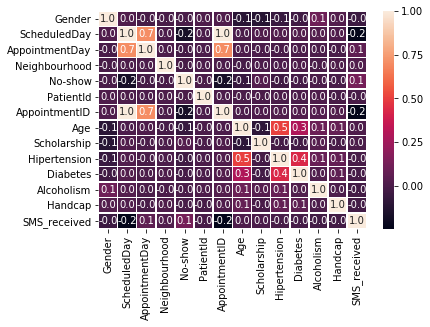

In [4]:
sb.heatmap(data_final.corr(),annot=True,linewidth=.5,fmt='.1f')

<h2 style='color:RED' align="center"> EXPLORATORY DATA ANALYSIS </h2>

<h2 style='color:blue' align="center">Distributions of numeric features</h2>

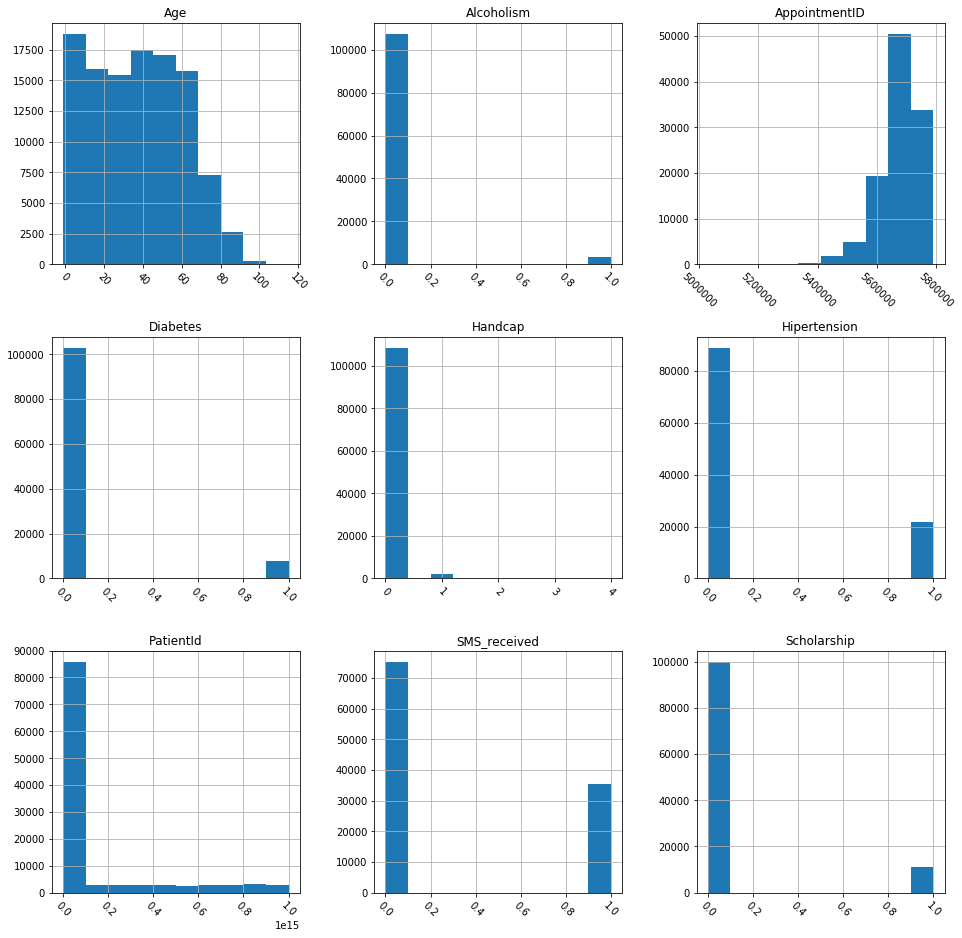

In [5]:
data.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

<h2 style='color:blue' align="center"> PLOTTING ON GENDER </h2>

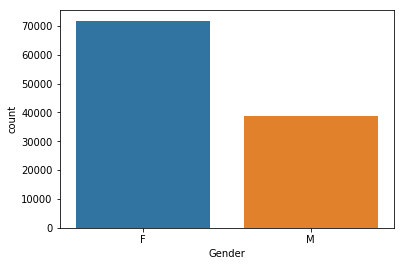

In [6]:
sb.countplot(x='Gender',data=data)

<h2 style='color:BLACK' align="center"> COMPARISION BETWEEN NO SHOWS AND GENDER </h2>

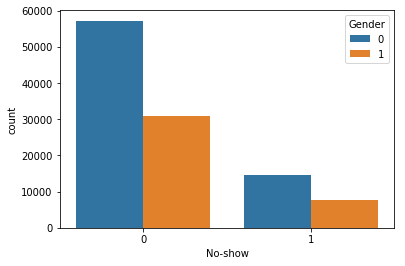

In [7]:
sb.countplot(x='No-show',hue='Gender',data=data_final)

plt.show()

<h2 style='color:BLACK' align="center"> REPRESENTS ON NO-SHOW </h2>

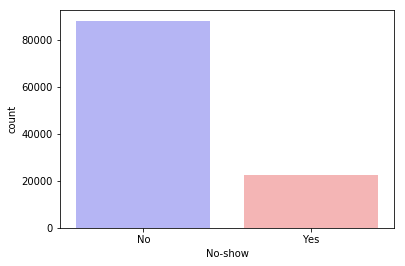

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='No-show',data=data,palette='bwr')
plt.show()

<h2 style='color:blue' align="center">Represents no. of males and females in sex column</h2>

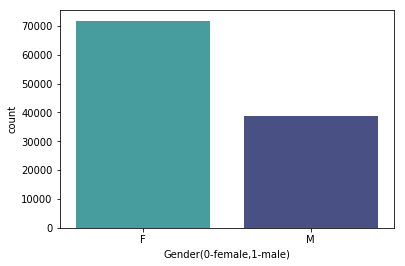

In [9]:
sns.countplot(x='Gender',data=data,palette='mako_r')
plt.xlabel("Gender(0-female,1-male)")
plt.show()

<h2 style='color:blue' align="center"> REPRESENTS ON NO SHOW FOR GENDER</h2>

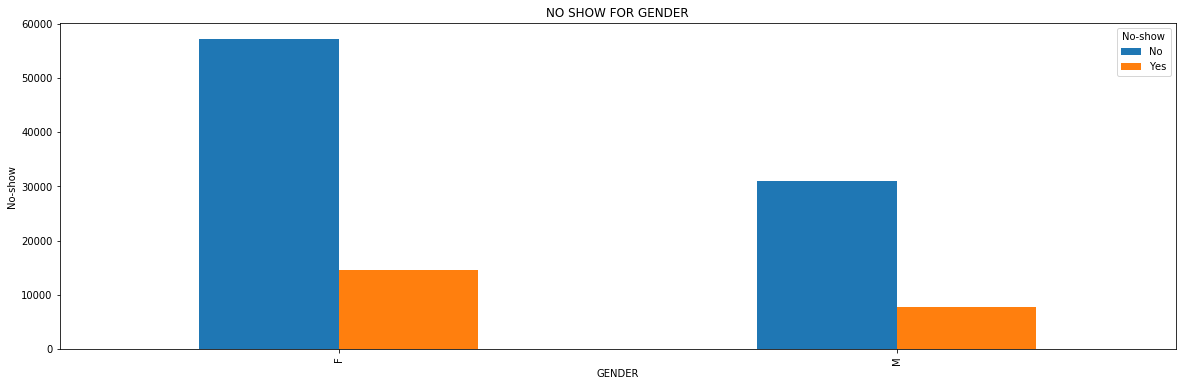

In [10]:
pd.crosstab(data.Gender,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR GENDER")
plt.xlabel("GENDER")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center"> REPRESENTS ON NO SHOW FOR AGE</h2> 

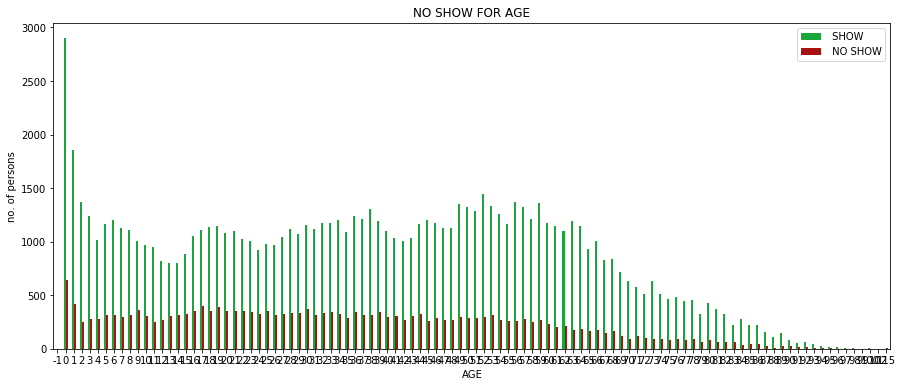

In [11]:
pd.crosstab(data.Age,data['No-show']).plot(kind='bar',figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('NO SHOW FOR AGE')
plt.xlabel('AGE')
plt.ylabel('no. of persons')
plt.xticks(rotation=0)
plt.legend([' SHOW',' NO SHOW'])
plt.show()

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR HIPERTENSION</h2> 

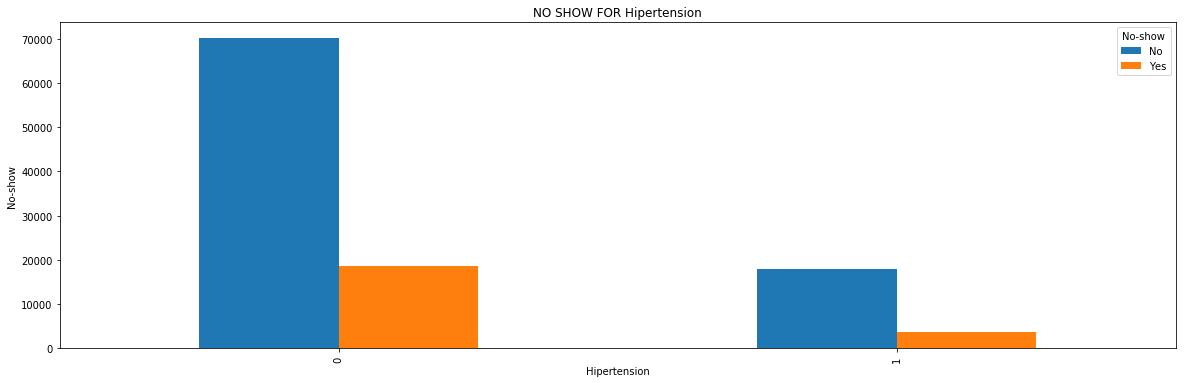

In [12]:
pd.crosstab(data.Hipertension,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR Hipertension")
plt.xlabel("Hipertension")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR DIABETES</h2> 

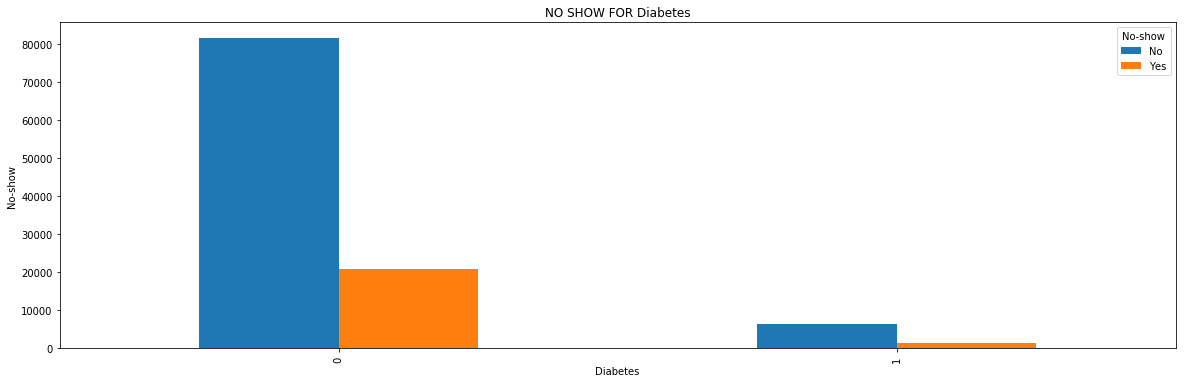

In [13]:
pd.crosstab(data.Diabetes,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR Diabetes")
plt.xlabel("Diabetes")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR ALCOHOLISM</h2> 

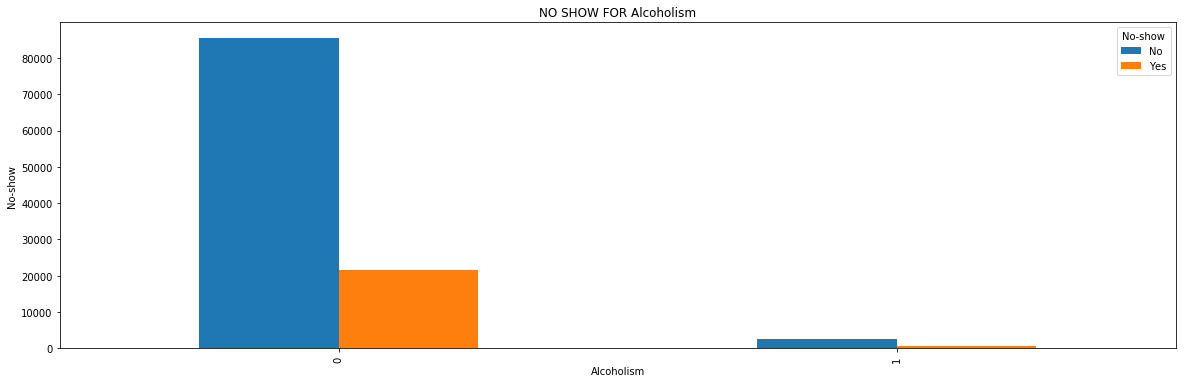

In [14]:
pd.crosstab(data.Alcoholism,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR Alcoholism")
plt.xlabel("Alcoholism")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR HANDCAP</h2> 

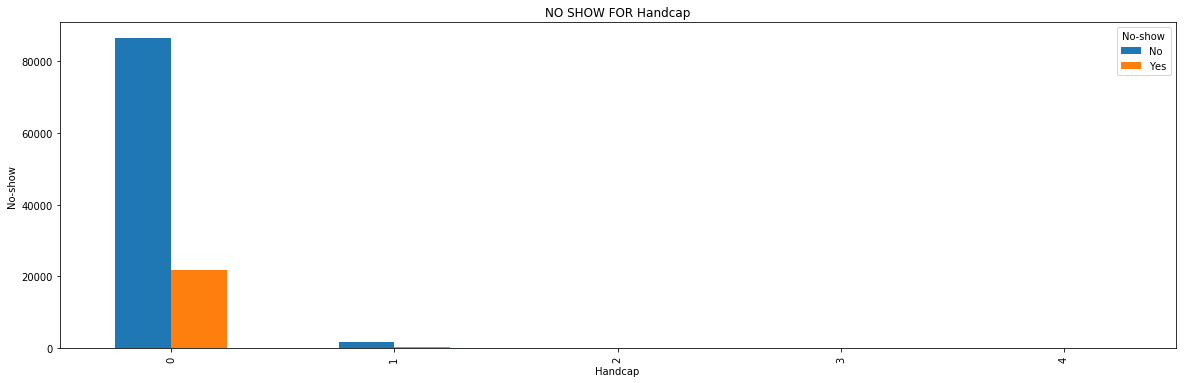

In [15]:
pd.crosstab(data.Handcap,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR Handcap")
plt.xlabel("Handcap")
plt.ylabel('No-show')
plt.show()

<h2 style='color:GREEN' align="center">REPRESENTS ON NO SHOW FOR SMS_RECEIVED</h2> 

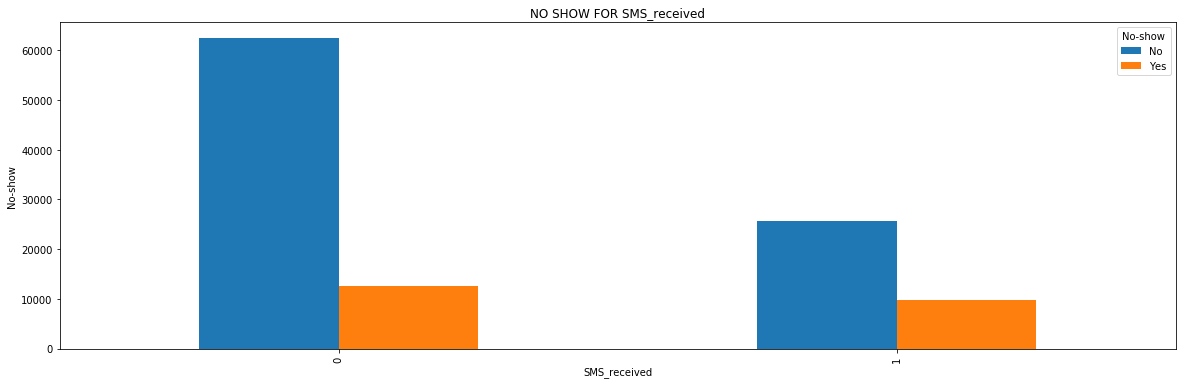

In [16]:
pd.crosstab(data.SMS_received,data['No-show']).plot(kind='bar',figsize=(20,6))
plt.title("NO SHOW FOR SMS_received")
plt.xlabel("SMS_received")
plt.ylabel('No-show')
plt.show()

In [17]:
cor=data_final.corr()
cor_target=abs(cor["No-show"])
relevant_features=cor_target[cor_target>0.5]
relevant_features

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data_final.drop('No-show',1),data_final['No-show'],test_size=.2,random_state=10)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature=SelectKBest(chi2,k=5).fit(X_train,y_train)

#print('Scorelist:',select_feature.scores_)
#print('Feature list:',X_train.columns)

<h2 style='color:blue' align="center">RANDOM FOREST</h2>

In [18]:
X=data_final[['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood','PatientId', 'AppointmentID', 'Age', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]
y=data_final['No-show']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier

lg=RandomForestClassifier()

print(lg.fit(X_train,y_train))

lg.score(X_train,y_train)

predict=lg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(predict,y_test)

C:\Users\siva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


0.7940724899928716

In [19]:
from sklearn.metrics import accuracy_score

A=accuracy_score(predict,y_test)
print("ACCURACY SCORE IS :" ,A)

ACCURACY SCORE IS : 0.7940724899928716


In [20]:
#data_final.to_csv('karim.csv')

noshow=pd.read_csv('karim.csv')



p=lg.predict(noshow)

noshow['PREDICT_NOSHOW1']=p

###  NO OF X-FEATURES

In [21]:
X_test.head()

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
84674,0,91315,21,29,29936,97583,21,0,0,0,0,0,0
3635,0,3245,2,59,61179,3413,38,0,0,0,0,0,1
16605,0,59654,16,43,15206,63775,39,0,0,0,0,0,0
103942,0,34674,23,68,60310,36820,25,0,0,0,0,0,1
274,0,26638,0,43,15306,28177,42,0,0,0,0,0,0


### NO OF Y-FEATURES

In [22]:
y_test.head()

84674     0
3635      0
16605     1
103942    1
274       0
Name: No-show, dtype: int32

### PREDICTION NO-SHOW

In [23]:
lg.predict([[0,91315 ,21 ,29 ,30223 ,97583 ,21 ,0 ,0 ,0 ,0 ,0 ,0]])

array([0])

In [24]:
noshow.to_csv('NOSHOW PREDICTABILTY.csv')